optimize > constrained 1/5 dofs
optimize > optimum value 0.00e+00
solve > solving 4 dof system to machine precision using arnoldi solver
solve > solver returned with residual 0e+00


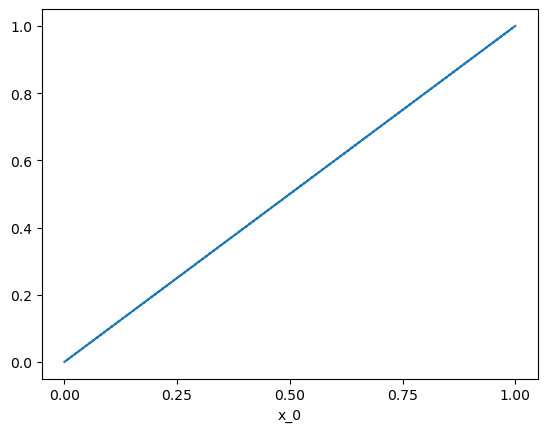

In [12]:
from nutils import function, mesh, solver
from nutils.expression_v2 import Namespace
import numpy
from matplotlib import pyplot as plt

topo, geom = mesh.rectilinear([numpy.linspace(0, 1, 5)])

ns = Namespace()
ns.x = geom
ns.define_for('x', gradient='∇', normal='n', jacobians=('dV', 'dS'))
ns.basis = topo.basis('spline', degree=1)
ns.u = function.dotarg('lhs', ns.basis)

sqr = topo.boundary['left'].integral('u^2 dS' @ ns, degree=2)
cons = solver.optimize('lhs', sqr, droptol=1e-15)
# optimize > constrained 1/5 dofs
# optimize > optimum value 0.00e+00

res = topo.integral('∇_i(basis_n) ∇_i(u) dV' @ ns, degree=0)
res -= topo.boundary['right'].integral('basis_n dS' @ ns, degree=0)
lhs = solver.solve_linear('lhs', residual=res, constrain=cons)
# solve > solving 4 dof system to machine precision using arnoldi solver
# solve > solver returned with residual 9e-16±1e-15

bezier = topo.sample('bezier', 32)
nanjoin = lambda array, tri: numpy.insert(array.take(tri.flat, 0).astype(float),
    slice(tri.shape[1], tri.size, tri.shape[1]), numpy.nan, axis=0)
sampled_x = nanjoin(bezier.eval('x_0' @ ns), bezier.tri)
def plot_line(func, **arguments):
    plt.plot(sampled_x, nanjoin(bezier.eval(func, **arguments), bezier.tri))
    plt.xlabel('x_0')
    plt.xticks(numpy.linspace(0, 1, 5))

plot_line(ns.u, lhs=lhs)

In [13]:
mesh.rectilinear([[0, 0.25, 0.5, 0.75, 1.0]])

(StructuredTopology<4>, Array<1>)

In [14]:
topo, geom = mesh.rectilinear([numpy.linspace(0, 1, 5)])

In [15]:
mesh.rectilinear([numpy.linspace(0, 1, 5), numpy.linspace(0, 1, 9)])

(StructuredTopology<4x8>, Array<2>)

In [16]:
topo.boundary['left']

StructuredTopology<>

In [17]:
mesh.rectilinear([numpy.linspace(0, 1, 5), numpy.linspace(0, 1, 9)], periodic=[1])

(StructuredTopology<4x8p>, Array<2>)

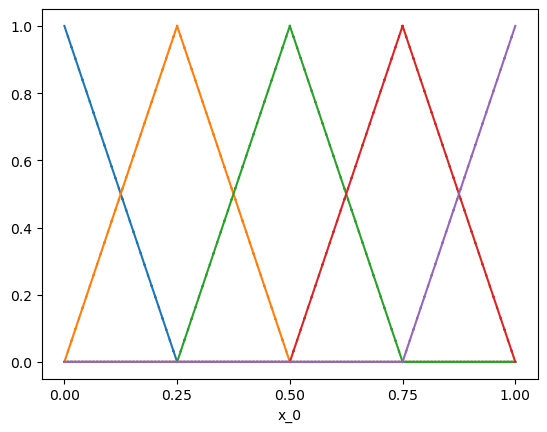

In [36]:
basis = topo.basis('spline', degree=1)
plot_line(basis)

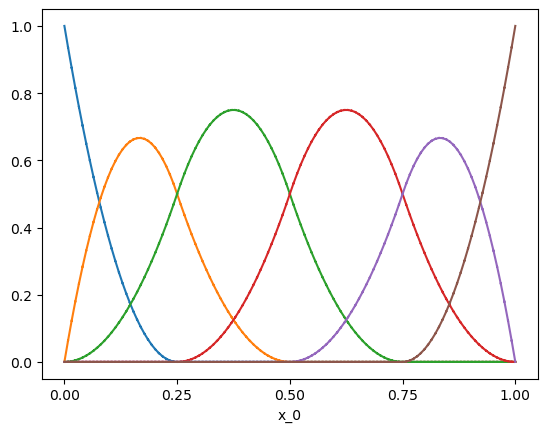

In [19]:
basis = topo.basis('spline', degree=2)
plot_line(basis)

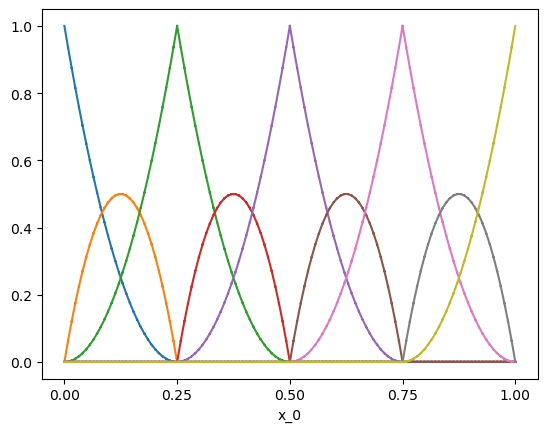

In [20]:
plot_line(topo.basis('spline', degree=2, continuity=0))

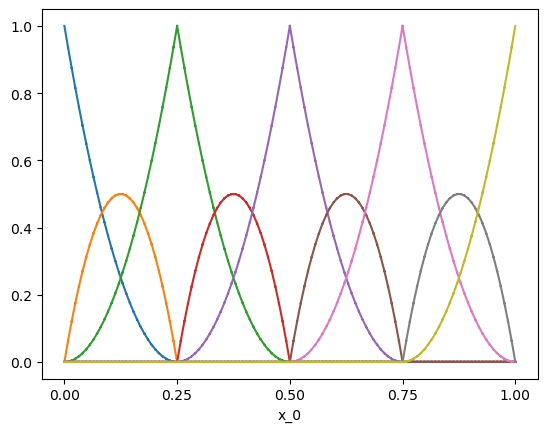

In [21]:
plot_line(topo.basis('std', degree=2))

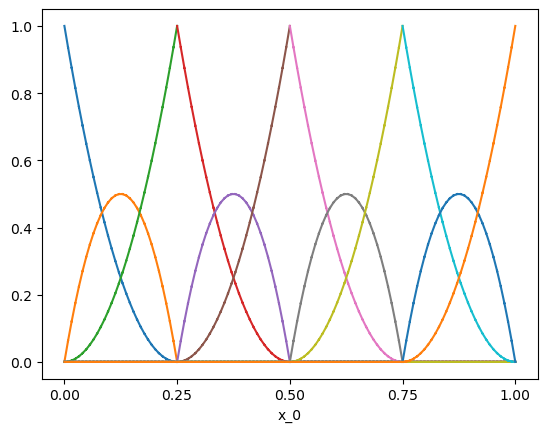

In [22]:
plot_line(topo.basis('discont', degree=2))

In [37]:
geom

Array<1>

In [38]:
geom.shape

(1,)

In [39]:
basis

Array<5>

In [40]:
basis.shape

(5,)

In [41]:
geom.ndim

1

In [42]:
geom.dtype

float

In [43]:
geom[0]

Array<>

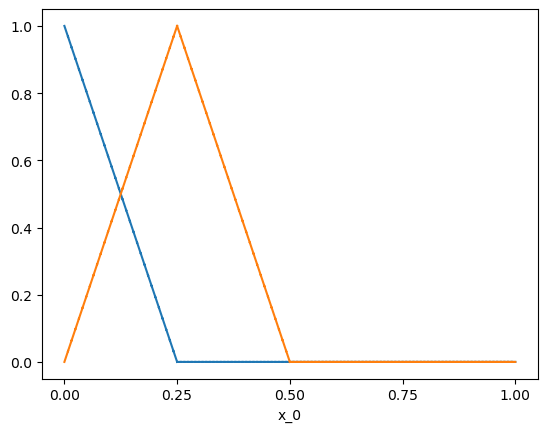

In [44]:
plot_line(basis[:2])

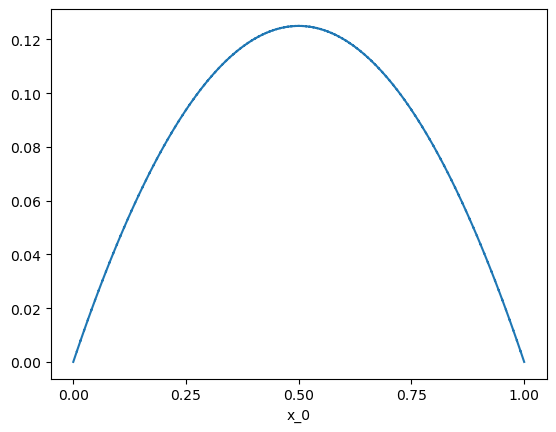

In [45]:
plot_line(geom[0]*(1-geom[0])/2)

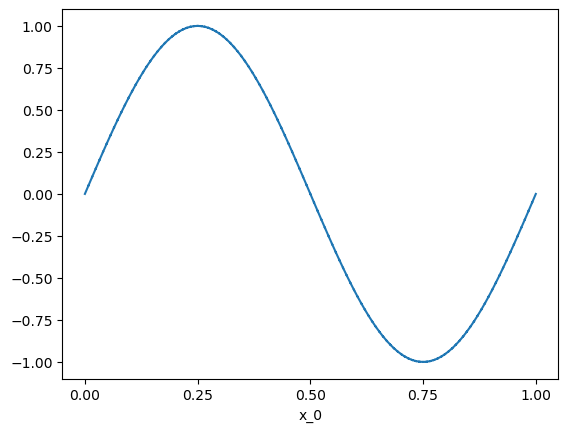

In [46]:
plot_line(function.sin(2*geom[0]*numpy.pi))

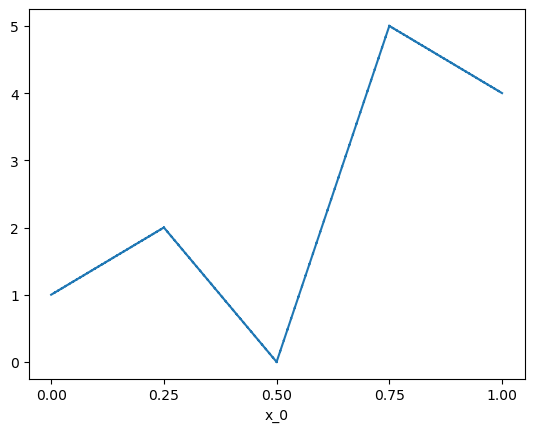

In [47]:
plot_line(function.dot(basis, [1,2,0,5,4]))

In [48]:
ns.u = function.dotarg('lhs', ns.basis)

AttributeError: 'Namespace' object has no attribute 'basis'

In [49]:
ns = Namespace()

In [50]:
ns.x = geom

In [51]:
ns.define_for('x', gradient='∇', normal='n', jacobians=('dV', 'dS'))

In [52]:
ns.basis = topo.basis('spline', degree=1)

In [53]:
ns.u = function.dotarg('lhs', ns.basis)

In [54]:
ns.a = 1
ns.b = 2
ns.c = numpy.array([1,2])
ns.A = numpy.array([[1,2],[3,4]])

In [55]:
ns.e = '2 a / 3 b'
ns.e = (2*ns.a) / (3*ns.b) # equivalent w/o expression

In [56]:
localvar = 1
ns.f = '2 localvar'

ExpressionSyntaxError: No such variable: `localvar`.
2 localvar
  ^^^^^^^^

In [57]:
ns.f_i = '2 c_i'
ns.f = 2*ns.c # equivalent w/o expression

In [58]:
ns.g_ijk = 'c_i A_jk'
ns.g_kji = 'c_k A_ji'
ns.g = ns.c[:,numpy.newaxis,numpy.newaxis]*ns.A[numpy.newaxis,:,:] # equivalent w/o expression

In [60]:
'2 a / 3 b' @ ns
# Array<>
(2*ns.a) / (3*ns.b) # equivalent w/o `... @ ns`
# Array<>

Array<>

In [74]:
'2 c_i' @ ns
# Array<2>
2*ns.c # equivalent w/o `... @ ns`
# Array<2>

Array<2>

In [62]:
'c_i A_jk' @ ns
# Array<2,2,2>
ns.c[:,numpy.newaxis,numpy.newaxis]*ns.A[numpy.newaxis,:,:] # equivalent w/o `... @ ns`
# Array<2,2,2>

Array<2,2,2>

In [65]:
I = topo.integral('1 dV' @ ns, degree=0)
I
# Array<>


Array<>

In [66]:
I.eval()
# 1.0±1e-15


1.0

In [67]:
topo.integral('(1 + 1) dV' @ ns, degree=0).eval()
# 2.0±1e-15
topo.integral('1 + 1 dV' @ ns, degree=0).eval()
# 5.0±1e-15


5.0

In [68]:
J = topo.integral('x_0 dV' @ ns, degree=1)
(I+J).eval()
# 1.5±1e-15


1.5

In [69]:
topo.boundary.integral('x_0 dS' @ ns, degree=1).eval()
# 1.0±1e-15

1.0

In [70]:
topo.boundary['right'].integral('x_0 dS' @ ns, degree=1).eval()
# 1.0±1e-15


1.0

In [72]:
topo.integral('basis_i dV' @ ns, degree=1).eval()


array([0.125, 0.25 , 0.25 , 0.25 , 0.125])

In [75]:
M = topo.integral('∇_i(basis_m) ∇_i(basis_n) dV' @ ns, degree=1).eval()
M.export('dense')

array([[ 4., -4.,  0.,  0.,  0.],
       [-4.,  8., -4.,  0.,  0.],
       [ 0., -4.,  8., -4.,  0.],
       [ 0.,  0., -4.,  8., -4.],
       [ 0.,  0.,  0., -4.,  4.]])

In [76]:
M.export('csr') # (data, column indices, row pointers) # doctest: +NORMALIZE_WHITESPACE

(array([ 4., -4., -4.,  8., -4., -4.,  8., -4., -4.,  8., -4., -4.,  4.]),
 array([0, 1, 0, 1, 2, 1, 2, 3, 2, 3, 4, 3, 4], dtype=int32),
 array([ 0,  2,  5,  8, 11, 13], dtype=int32))

In [77]:
M.export('coo')

(array([ 4., -4., -4.,  8., -4., -4.,  8., -4., -4.,  8., -4., -4.,  4.]),
 (array([0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4]),
  array([0, 1, 0, 1, 2, 1, 2, 3, 2, 3, 4, 3, 4], dtype=int32)))

In [81]:
A = topo.integral('basis_m basis_n dV' @ ns, degree=2).eval()
f = topo.integral('basis_n x_0 dV' @ ns, degree=2).eval()
A.solve(f)


solve > solving 5 dof system to machine precision using arnoldi solver
solve > solver returned with residual 3e-17


array([5.77936353e-17, 2.50000000e-01, 5.00000000e-01, 7.50000000e-01,
       1.00000000e+00])

In [82]:
res = topo.integral('basis_n (u - x_0) dV' @ ns, degree=2)

In [83]:
A = res.derivative('lhs').eval()
f = -res.eval(lhs=numpy.zeros(5))
A.solve(f)

solve > solving 5 dof system to machine precision using arnoldi solver
solve > solver returned with residual 3e-17


array([5.77936353e-17, 2.50000000e-01, 5.00000000e-01, 7.50000000e-01,
       1.00000000e+00])

In [84]:
solver.solve_linear('lhs', res)

solve > solving 5 dof system to machine precision using arnoldi solver
solve > solver returned with residual 3e-17


array([5.77936353e-17, 2.50000000e-01, 5.00000000e-01, 7.50000000e-01,
       1.00000000e+00])

In [85]:
sqr = topo.integral('(u - x_0)^2 dV' @ ns, degree=2)
solver.solve_linear('lhs', sqr.derivative('lhs'))

solve > solving 5 dof system to machine precision using arnoldi solver
solve > solver returned with residual 6e-17


array([5.77936353e-17, 2.50000000e-01, 5.00000000e-01, 7.50000000e-01,
       1.00000000e+00])

In [86]:
solver.optimize('lhs', sqr)

optimize > solve > solving 5 dof system to machine precision using arnoldi solver
optimize > solve > solver returned with residual 4e-17
optimize > optimum value 5.55e-17


array([3.39934989e-17, 2.50000000e-01, 5.00000000e-01, 7.50000000e-01,
       1.00000000e+00])

In [87]:
sqr = topo.boundary['left'].integral('(u - 0)^2 dS' @ ns, degree=2)

In [102]:
cons = solver.optimize('lhs', sqr, droptol=1e-15)

optimize > constrained 1/5 dofs
optimize > optimum value 0.00e+00


In [103]:
cons

array([ 0., nan, nan, nan, nan])

In [104]:
res = topo.integral('∇_i(basis_n) ∇_i(u) dV' @ ns, degree=0) - topo.boundary['right'].integral('basis_n dS' @ ns, degree=0)

In [105]:
lhs = solver.solve_linear('lhs', res, constrain=cons)

solve > solving 4 dof system to machine precision using arnoldi solver
solve > solver returned with residual 0e+00


In [106]:
lhs

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [107]:
bezier = topo.sample('bezier', 2)

In [108]:
x = bezier.eval('x_0' @ ns)
x

array([0.  , 0.25, 0.25, 0.5 , 0.5 , 0.75, 0.75, 1.  ])

In [114]:
x.take(bezier.tri, 0)

array([[0.  , 0.25],
       [0.25, 0.5 ],
       [0.5 , 0.75],
       [0.75, 1.  ]])

In [127]:
x.take(bezier.tri.T, 0)

array([[0.  , 0.25, 0.5 , 0.75],
       [0.25, 0.5 , 0.75, 1.  ]])

In [110]:
u = bezier.eval('u' @ ns, lhs=lhs)
u

array([0.  , 0.25, 0.25, 0.5 , 0.5 , 0.75, 0.75, 1.  ])

In [132]:
u.take(bezier.tri, 0)

array([[0.  , 0.25],
       [0.25, 0.5 ],
       [0.5 , 0.75],
       [0.75, 1.  ]])

In [138]:
u.take(bezier.tri.T, 0)

array([[0.  , 0.25, 0.5 , 0.75],
       [0.25, 0.5 , 0.75, 1.  ]])

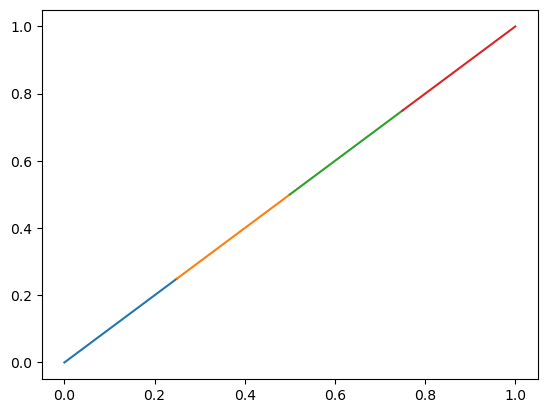

In [143]:
plt.plot(x.take(bezier.tri.T, 0), u.take(bezier.tri.T, 0))

In [145]:
nanjoin = lambda array, tri: numpy.insert(array.take(tri.flat, 0).astype(float),
    slice(tri.shape[1], tri.size, tri.shape[1]), numpy.nan, axis=0)
nanjoin(x, bezier.tri)

array([0.  , 0.25,  nan, 0.25, 0.5 ,  nan, 0.5 , 0.75,  nan, 0.75, 1.  ])

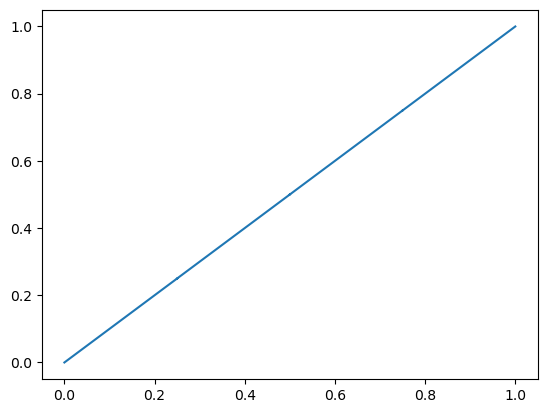

In [146]:
plt.plot(nanjoin(x, bezier.tri), nanjoin(u, bezier.tri))